## MDSC-106 Final Lab: Group-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_excel('./Shopping Trends - Q2/shopping_trends.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
df.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [5]:
df.shape

(3900, 18)

In [6]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

We see that there are no null values.

### Displaying all the rows and columns of the dataframe

In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
5               6   46    Male       Sneakers     Footwear   
6               7   63    Male          Shirt     Clothing   
7               8   27    Male         Shorts     Clothing   
8               9   26    Male           Coat    Outerwear   
9              10   57    Male        Handbag  Accessories   
10             11   53    Male          Shoes     Footwear   
11             12   30    Male         Shorts     Clothing   
12             13   61    Male           Coat    Outerwear   
13             14   65    Male          Dress     Clothing   
14             15   64    Male           Coat    Outerwear   
15             16   64    Male          Skirt     Clothing   
16             17   25    Male     Sunglasses  Accessories   
17             18   53    Male          Dress     Clothing   
18             19   52    Male        Sweater     Clothing   
19             20   66    Male          Pants     Clothing   
20             21   21    Male          Pants     Clothing   
21             22   31    Male          Pants     Clothing   
22             23   56    Male          Pants     Clothing   
23             24   31    Male          Pants     Clothing   
24             25   18    Male         Jacket    Outerwear   
25             26   18    Male         Hoodie     Clothing   
26             27   38    Male        Jewelry  Accessories   
27             28   56    Male         Shorts     Clothing   
28             29   54    Male        Handbag  Accessories   
29             30   31    Male          Dress     Clothing   
30             31   57    Male        Jewelry  Accessories   
31             32   33    Male          Dress     Clothing   
32             33   36    Male         Jacket    Outerwear   
33             34   54    Male          Pants     Clothing   
34             35   36    Male        T-shirt     Clothing   
35             36   54    Male         Blouse     Clothing   
36             37   35    Male        T-shirt     Clothing   
37             38   35    Male          Jeans     Clothing   
38             39   29    Male          Dress     Clothing   
39             40   70    Male          Pants     Clothing   
40             41   69    Male        Handbag  Accessories   
41             42   67    Male          Scarf  Accessories   
42             43   20    Male           Coat    Outerwear   
43             44   25    Male          Scarf  Accessories   
44             45   39    Male            Hat  Accessories   
45             46   50    Male          Socks     Clothing   
46             47   57    Male          Shirt     Clothing   
47             48   55    Male        Jewelry  Accessories   
48             49   42    Male          Shirt     Clothing   
49             50   68    Male         Hoodie     Clothing   
50             51   49    Male         Blouse     Clothing   
51             52   59    Male          Skirt     Clothing   
52             53   42    Male        T-shirt     Clothing   
53             54   29    Male          Skirt     Clothing   
54             55   47    Male           Coat    Outerwear   
55             56   40    Male         Jacket    Outerwear   
56             57   41    Male       Backpack  Accessories   
57             58   21    Male           Coat    Outerwear   
58             59   69    Male         Hoodie     Clothing   
59             60   63    Male           Belt  Accessories   
60             61   50    Male        Sweater     Clothing   
61             62   55    Male          Scarf  Accessories   
62             63   30    Male       Sneakers     Footwear   
63             64   33    Male     Sun

In [8]:
pd.reset_option('all')

## Visualising categorical features

In [9]:
genders = pd.DataFrame(df['Gender'].value_counts())
sizes = pd.DataFrame(df['Size'].value_counts())
categories = pd.DataFrame(df['Category'].value_counts())
seasons = pd.DataFrame(df['Season'].value_counts())
subscriptions = pd.DataFrame(df['Subscription Status'].value_counts())
discounts = pd.DataFrame(df['Discount Applied'].value_counts())
promos = pd.DataFrame(df['Promo Code Used'].value_counts())
payments = pd.DataFrame(df['Payment Method'].value_counts())
frequencies = pd.DataFrame(df['Frequency of Purchases'].value_counts())

In [44]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {'type': 'pie'}]])
fig.add_trace(go.Pie(labels=genders.index, values = [x for x in genders['count']]),1,1)
fig.add_trace(go.Pie(labels=sizes.index, values = [x for x in sizes['count']]),1,2)
fig.add_trace(go.Pie(labels=categories.index, values = [x for x in categories['count']]),1,3)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(title_text="Composition of Categorical Features",
                  annotations=[
                        dict(text='Gender', x=0.115, y=0.5, font_size=20, showarrow=False),
                        dict(text='Size', x=0.5, y=0.5, font_size=20, showarrow=False),
                        dict(text='Category', x=.893, y=0.5, font_size=20, showarrow=False)])

The dataset has more entries where the customer's gender is Male. Almost 70% of the purchases entries are of customers being Male.

We can also see that most of the people have bought products (clothing, outerwear, etc) of size M.

Mostly all the purchases are of the 'Clothing' category. Maybe people are more comfortable buying clothes and accessories in this given store. 

A Doughnout chart was chosen to visualize these features as Doughnut and Pie charts are the best way to visualize composition of the data. 

In [45]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {'type': 'pie'}]])
fig.add_trace(go.Pie(labels=seasons.index, values = [x for x in seasons['count']]),1,1)
fig.add_trace(go.Pie(labels=subscriptions.index, values = [x for x in subscriptions['count']]),1,2)
fig.add_trace(go.Pie(labels=discounts.index, values = [x for x in discounts['count']]),1,3)
fig.update_traces(hole=.5, hoverinfo="label+percent+name")
fig.update_layout(title_text="Composition of Categorical Features",
                  annotations=[dict(text='Season', x=0.115, y=0.5, font_size=20, showarrow=False),
                               dict(text='Subscription', x=0.5, y=0.5, font_size=20, showarrow=False),
                               dict(text='Discount', x=.893, y=0.5, font_size=20, showarrow=False)])

There is no kind of influence based on seasons apparent in this dataset. The purchases are distributed pretty much equally among all the seasons.

It is seen that around 73% of the customers of the given store did not avail the subscription that the store provides. Maybe the store needs to work on their subscription terms as it is very apparent that most of the people did not want to have the subscription.

More than 50% of the customers did not avail any discount, it could mean that the prices were already well in the affordable range.

In [46]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {'type': 'pie'}]])
fig.add_trace(go.Pie(labels=promos.index, values = [x for x in promos['count']]),1,1)
fig.add_trace(go.Pie(labels=payments.index, values = [x for x in payments['count']]),1,2)
fig.add_trace(go.Pie(labels=frequencies.index, values = [x for x in frequencies['count']]),1,3)
fig.update_traces(hole=.7, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Composition of Categorical Features",
    annotations=[
        dict(text='Promo Code Used', x=0.080, y=0.5, font_size=18, showarrow=False),
        dict(text='Payment Method', x=0.5, y=0.5, font_size=18, showarrow=False),
        dict(text='Purchase Frequency', x=.935, y=0.5, font_size=18, showarrow=False)])

The 'promo code used' feature directly corresponds and correlates to the 'Discount Availed' feature, which makes perfect sense as one of them is consequence of the other. Applying a promo code is one way to avail a discount from the price. The matching composition concretizes this inference.

The payments are well distributed. There is no significant dominance over usage of one specific payment method. If you look at it in a fine-grained level, Paypal is being used the most at 17.4% of occurences.

The Purchase Frequency from different customers is also well distributed. The store has customers ranging from who buy products Bi-Weekly to Annually. Most of the customers buy products every 3 months once.

The number of male records is double the number of female entries. In order to balance it, we can take a random sample of male records of size equal to the number of female records to balance the data.

In [13]:
male_df = df[df.Gender == 'Male']
female_df = df[df.Gender == 'Female']
gender_balanced_df = pd.concat([female_df, male_df.sample(n=female_df.shape[0])])

We can encode the object dtype features to use them as floats or ints.


In [14]:
encoded_df = gender_balanced_df.copy()

encoded_df['Gender'] = [0 if gender == 'Male' else 1 for gender in encoded_df['Gender']]
encoded_df['Subscription Status'] = [0 if status == 'No' else 1 for status in encoded_df['Subscription Status']]
encoded_df['Discount Applied'] = [0 if x == 'No' else 1 for x in encoded_df['Discount Applied']]
encoded_df['Promo Code Used'] = [0 if x == 'No' else 1 for x in encoded_df['Promo Code Used']]

Here, we are encoding in the following way:
* Gender:
    * 0 = Male
    * 1 = Female
* Subscription Status:
    * 0 = No
    * 1 = Yes
    
<br>Same for Discount Applied and Promo Code Used.

<Axes: >

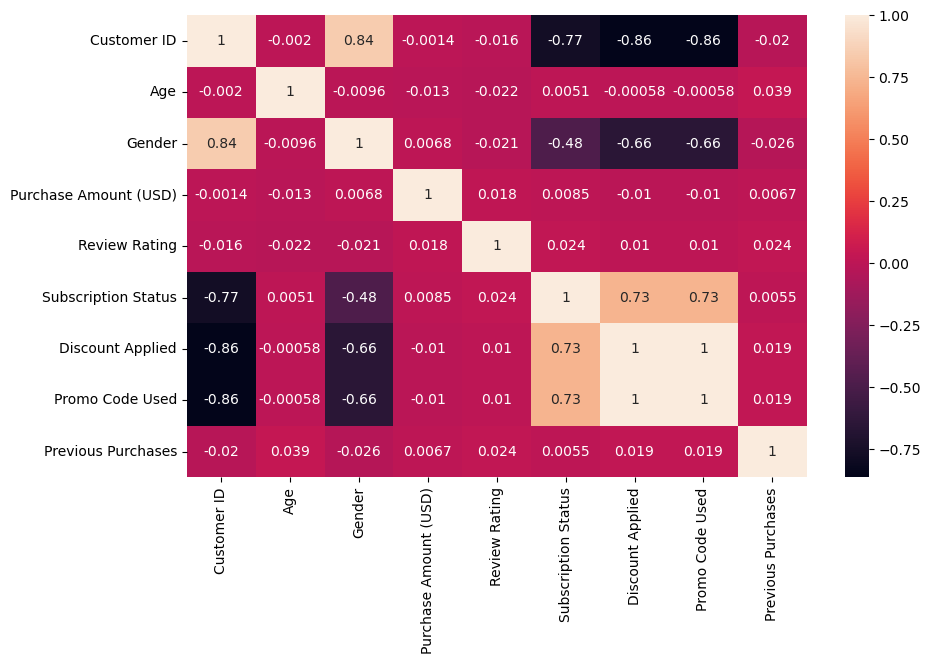

In [15]:
plt.subplots(figsize=(10,6))
sns.heatmap(encoded_df.corr(numeric_only=True), annot=True)

Here, we can ignore the correlations along the customer id feature.<br>
We see very high positive correlation between Subscription Status and both Discount Applied and Promo Code Used.<br>
Furthermore, since Discount Applied and Promo Code Used have a correlation coefficient of 1, the two features are more or less duplicates, so we can drop one of the features without any particular loss of data.

In [16]:
encoded_df.drop(['Promo Code Used', 'Customer ID'], axis=1, inplace=True)

<Axes: >

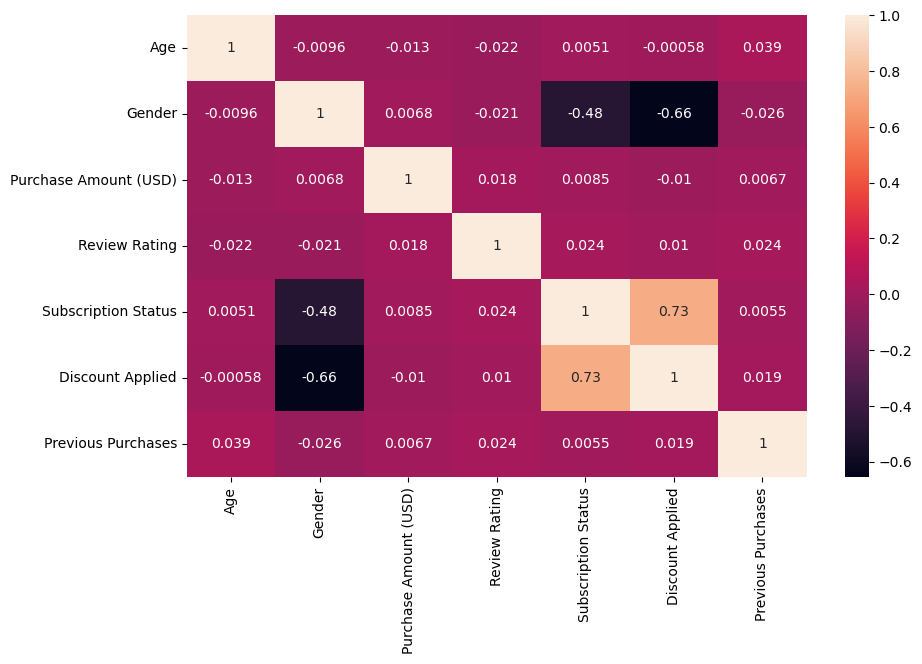

In [17]:
plt.subplots(figsize=(10,6))
sns.heatmap(encoded_df.corr(numeric_only=True), annot=True)

We see a negative correlation between Gender and Discount Applied and Subscription Status.<br>
Since Males are encoded to 0, we can infer that Males are more likely to aval Discounts.

In [18]:
def throwHistogram(df, feature, color=None, text_auto=False, title=''):
    fig = px.histogram(df, x=feature, color=color, text_auto=text_auto, title=title)
    fig.show()

def horizontalCount(df, feature, color, sorting='descending', title=''):
    fig = px.histogram(df, y=feature, color=color, text_auto=True, title=title).update_yaxes(categoryorder='total ' + sorting)
    fig.show()

def verticalCount(df, feature, color, sorting='ascending', title=''):
    fig = px.histogram(df, x=feature, color=color, text_auto=True, title=title).update_xaxes(categoryorder='total ' + sorting)
    fig.show()

def hundredPerStack(df, feature, color=None, barnorm='percent', text_auto=True, title=''):
    fig = px.histogram(df, x=feature, color=color, barnorm=barnorm, text_auto=text_auto, title=title)
    fig.show()


In [19]:
throwHistogram(gender_balanced_df, 'Discount Applied', 'Gender', text_auto=True, title='Discount Applied vs Gender')

We try to see which gender is more inclined toward availing discounts and contrary to popular belief we can see here that none of the women who shop at this store have availed a discount. Infact more than 50% of the men who shop in this store avail discounts.

A Stacked Bar Chart was used to compare totals and to see their breakdowns.

In [20]:
throwHistogram(gender_balanced_df, 'Subscription Status', 'Gender', text_auto=True, title='Discount Applied vs Gender')

This implies that in the given dataset, zero females avail discounts and zero females are subscribed.

##### Let us now analyse the frequencies and tendencies of the various features.

In [21]:
horizontalCount(df, 'Item Purchased', 'Item Purchased', sorting='ascending', title='Most purchased items')

A wide variety of products are sold in the given store but it would seem that most of the customers shop at this store for only a selective few products. Jewelery, Pants, Shirts and Dresses are the top 5 products purchased with a count of 171, 171, 171, 169 and 166 respectively. It is a three-way tie between Jewelery, Pants and Blouse.

A Horizontal Bar Chart arranged from largest to smallest was chosen to be used to visualize this data as it is the best practice to visualize nominal values and compare them.

In [22]:
verticalCount(df, 'Location', 'Location', sorting='descending', title='Locations with highest purchase counts')

Customers from a lot of places in the United States shop in this store but the highest number of customers are from Montana, California, Idaho, Illinois ans Alabama. Having 96, 95, 93, 92 and 89 customers respectively from each place.

Here, a Vertical Bar Chart is used in the same notion as to why an Horizontal Bar Chart is used above.

In [23]:
throwHistogram(gender_balanced_df, 'Size', color='Gender', text_auto=True)

As we had already seen above in the doughnut chart, most of the customers buy products of size M, this stacked bar chart also concretizes that gives us one more good information of the composition of the data in terms of gender too.

A Piechart could have also worked well in this visualization, but a Stacked Bar Plot also is a very good match for what we are trying to visualize here.

In [24]:
throwHistogram(gender_balanced_df, 'Color', 'Gender', text_auto=True)

We wanted to see how much is color correlated to gender, and we can see that men mostly buy clothes or accessories that are of the color black or silver whereas the female customers mostly buy yellow colored products.

In [25]:
throwHistogram(gender_balanced_df, 'Previous Purchases', 'Gender', text_auto=True)

Here we try to show how customers of different genders are frequent to this store and we can see through this stacked bar plot that most of the men are long-term customers to this store whereas most of the female customers are not long-term customers to this store.

In [26]:
throwHistogram(gender_balanced_df, 'Frequency of Purchases', 'Gender', text_auto=True)

This gives us a very significant inference from the point of view of frequency of purchases between the two genders and especially it adds to the previous inference where although most of the women have not been long-term customer with this store, they still come more frequent to purchase products. Most Women stand at a purchase frequency of Bi-Weekly whereas most Men being long-term customers purchase only once in a year.

In [27]:
hundredPerStack(gender_balanced_df, 'Frequency of Purchases', 'Gender', title='Frequency of Purchases across Genders')

This is a hundred percent stacked bar plot for the above shown stacked bar plot

#### Studying Age Groups and their buying habits

We start by encoding the age feature into bins of under 20, between 20 and 40, between 40 and 50, and over 50.

In [28]:
encoded_main_df = df.copy()
encoded_main_df['Age'] = ["Under 20" if x <= 20 and x > 0 else "Between 20 and 40" if x <=40 and x > 20 else "Between 40 and 50" if x <=50 and x > 40 else "50 Plus" for x in encoded_main_df['Age']]

In [29]:
px.box(encoded_main_df, x='Age', y='Previous Purchases', color = 'Age')

50% of the people in the age-group 'Under 20' are not very frequent in purchasing from this particular store, as compared to other age-groups. For example, people above 50, are very frequent customers to the store. So the store needs to probably work on their appeal that youngsters have over them. 50% of people in the age-group 50 and above are all very frequent customers.

Here, we use a box plot as it best shows the central tendency, along with the concentration of data across quartiles.

#### Comparing "Payment Method" with "Frequency of Purchases"

A bar chart is a suitable choice for comparing "Payment Method" with "Frequency of Purchases" because both of these variables are categorical. Here's why a bar chart is a good choice for this comparison:

Categorical Variables: Both "Payment Method" and "Frequency of Purchases" are categorical variables, meaning they consist of distinct categories or labels. A bar chart is well-suited for displaying the distribution of categorical data.

Comparison of Frequencies: A bar chart allows you to compare the frequencies or counts of each category (payment methods) within different subcategories (purchase frequencies). You can see how different payment methods are distributed across various purchase frequencies.

Visual Clarity: Bar charts use distinct bars for each category, making it easy to distinguish between payment methods. The use of different colors or patterns for each payment method further enhances visual clarity.

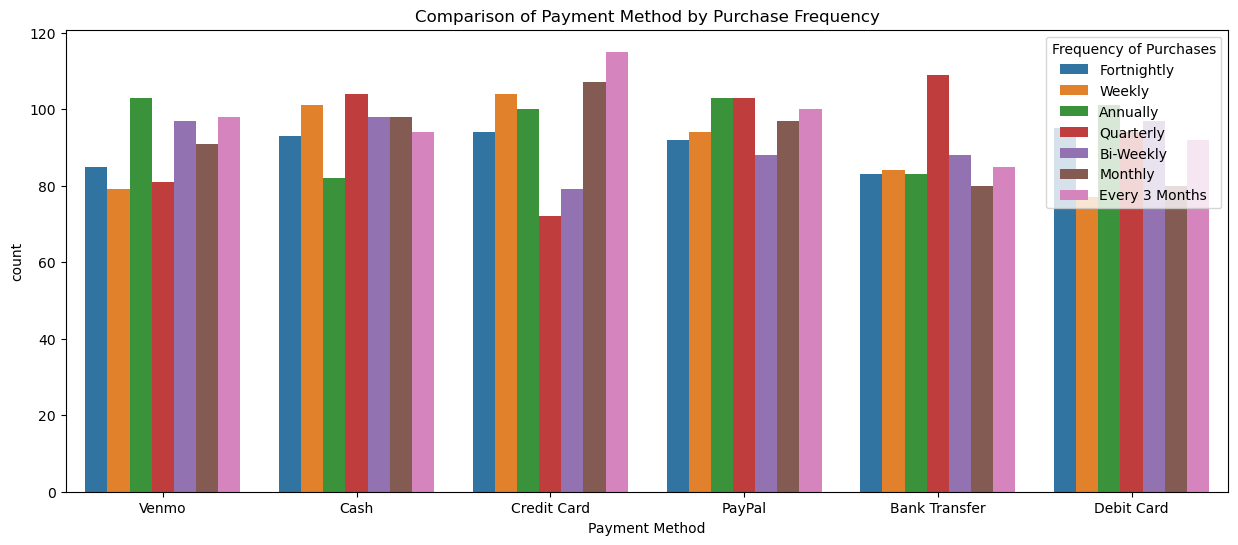

In [30]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Payment Method', hue='Frequency of Purchases')
plt.title('Comparison of Payment Method by Purchase Frequency')
plt.show()



Comparison of Frequencies: A bar chart allows you to compare the frequencies or counts of each category (payment methods) within different subcategories (purchase frequencies).

Most of the people prefer to use Cash or Debit Card Fortnightly.

Most of the people prefer to use Cash,Debit card or Credit Card Weekly.
Most of the people prefer to use Venomo or Paypal Anually.

Venmo Paymnet method is used the most annually.

Cash is used almost equally all the time but least used annually.

For every 3 months Credit Card is used for purchases the most and it is used the least Quaterly.

Paypal is equally used for purchases.

Most Bank transfers are done Quarterly rather than other purchases.
Debit Card is  freqently used for purchases for everytime except for monthly

### Comparison of Payment Method by Season

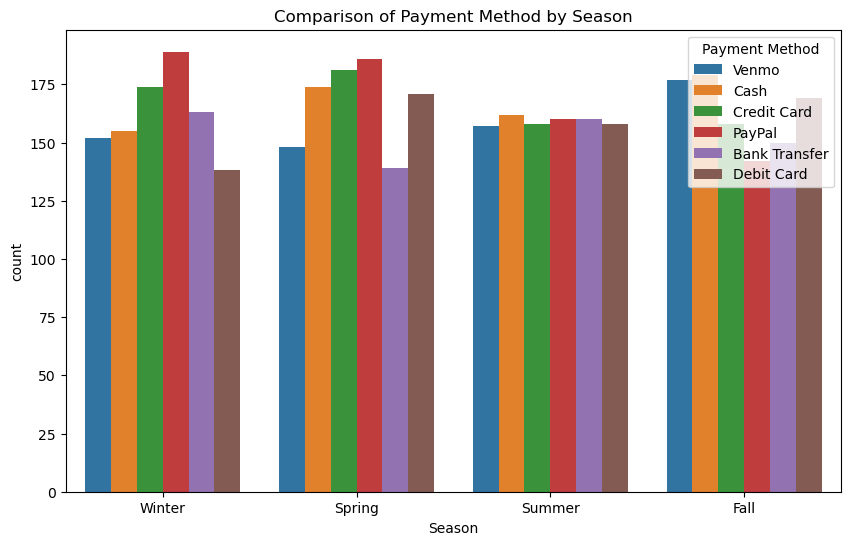

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season', hue='Payment Method')
plt.title('Comparison of Payment Method by Season')
plt.show()

During the summer season the diffrent payment methods are opted in a steady manner.

We observe Paypal is more dominant in the Winter and Summer season.

Cash is usually prefereed during the Fall.



#### Let us analyse frequency of discounts applied across various payment methods.

<Axes: xlabel='Payment Method', ylabel='count'>

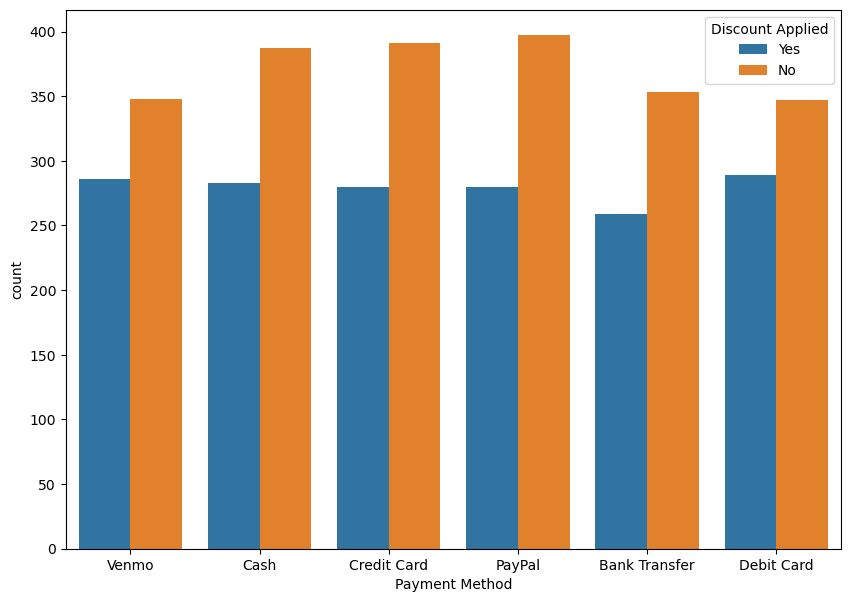

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x='Payment Method',hue='Discount Applied',data=df)

The count plot allows us to visually compare the frequency of discounts applied for different payment methods. We can see which payment methods have a higher or lower frequency of discounts, helping us to identify trends and make business decisions based on the data.

This type of plot is suitable for comparing the distribution of a categorical variable (discounts applied) across different categories of another categorical variable (payment methods).

We can observe that there is high discount applied to Debit Card holders compared to others.

#### Now, let us analyse the Colours and their popularity across seasons

In [33]:
def color_plotter(df, categories):
    for category in categories:
        temp_df = df[df['Category'] == category]
        colour_tendency = temp_df.groupby('Color')['Season'].value_counts(normalize=True).mul(100).round(2).unstack()
        colour_tendency = colour_tendency.transpose()
        fig = px.histogram(temp_df, x='Color', color='Season', barnorm='percent', text_auto='.2f', title=f'{category} colour dominance per season')
        fig.show()
        fig = px.scatter(colour_tendency[colour_tendency > 30], title=f'Popular colours for {category} per season')
        fig.update_traces(marker_size = 15)
        fig.update_layout(showlegend = False)
        fig.show()

In [34]:
color_plotter(df, list(df.Category.value_counts().index))

Here, we are able to visualize the dominance of each colour across each season. We use a stacked bar plot to visualise this as it gives us a normalized view irrespective of the frequency of a colour overall. Instead, it just quantifies how much a colour sells per season.

The scatter plot shows us the more dominant colours every season, using the threshold that if more than 35% of items with that colour is sold in a season, it is regarded as more popular on that season. We choose to use scatterplot mostly due to lack of a better alternative that can show us which attribute is more prevalent in what category. Furthermore, plotly provides the convenient feature of displaying details of each point when we hover over it, and ends up becoming a convenient way of visualising this data.

The value of a point along the y-axis denotes the dominance of it in a season. The higher its value, the higher its percentage of dominance. The x-axis denotes each season, and we can wee the colour values by hovering over the points. We probably could have coloured the points according to the colour they represent, but were unable to do so due to lack of time and a slight lack of expertise in plotly.

We can see here that clothing colours are mostly uniformly popular, but black coloured accessories are purchased more in winter.

Similarly, if we look at Footwear and Outerwear, we see that differnt colours dominate over different seasons, showing the varying preferences of buyers.

For example, we see that pink coloured outerwear is only bought in fall and winter.

#### Studying gender tendencies on buying different items

In [35]:
fig = px.histogram(gender_balanced_df, x='Item Purchased', color='Gender', barnorm='percent', text_auto='.2f')
fig.show()

In [36]:
item_buyers = gender_balanced_df.groupby('Item Purchased')['Gender'].value_counts(normalize=True).mul(100).round(2).unstack()
fig = px.scatter(item_buyers[item_buyers > 50])
fig.update_traces(marker_size = 15)
fig.show()

Here, we try to analyse purchase habits of different genders across different items sold. We are basically visualising which gender buys more of what item.

The 100% stacked bar plot gives us a complete view of what percentage of which gender buys what, while the scatter plot gives us just the dominant gender. Higher the y-axis value of a point, more the percentage of people of that gender who buy an item.

Note: We are using the gender_balanced_df here, and different samples might produce different results, but this is the output of a random sample, which is hopefully representative. Due to the Male gender dominance in the dataset, plotting this with the full dataset would have shown men as the more prominent buyers of all items.

#### Study on Review Rating

In [37]:
def review_tendency(df, feature, title=''):
    reviews = df.groupby(feature)['Review Rating'].mean().round(2)
    fig = px.line(reviews.sort_values(), title=title)
    # fig.update_traces(marker_size=15)
    fig.show()

In [38]:
review_tendency(df, 'Item Purchased', title='Revie Rating tendency against Items')

#### Inference for Review Rating for Item Purchased vs value<br>

From the above line plot we can infer that the item **Gloves** has more ratings than all other items.
So,<br> 
* In business point of view if the industry sells more gloves in all their shops it will be profit for them.<br>
* At the same time the plot shows that Shirt and jeans having very low rating of 3.63. So, it means that they have to work more on these items quatity to get more positive review and to get more profit across the Locations for this particular items

In [39]:
review_tendency(df, 'Location', title='Review Rating tendency against Location')

#### Inference for Review Rating on Locations vs value<br>

From the above line plot we can infer that the city **Texas** gave more ratings than all other cities.
So,<br> 
* In business point of view, Since the Shops of this particular industry have good rating for thier products in the cities like **Wisconsin and Texas**. if they open more shops it will get them more  profit<br>
* At the same time, the shops in the cities **West Virginia and New Hampshire** have less ratings in thier products.So, It is recommended to work on more campign and quality of their products which will help the industry to gain more profit.
 

In [40]:
review_tendency(df, 'Color', title='Review Rating tendency against Colour')

#### Inference for Review Rating on Colors vs value<br>

From the above line plot we can infer that the color **Gray and Yellow** gave more ratings than all other colors of their shops product across the cities.
So,<br> 
* In business point of view, Since the Gray color is liked to the customers in their shops. they sell more products in gray color or yellow color. so that their sells might increase.
* At the same time, they can reduce the production of products in the color **beige** because people are not showing their liking towards that color.

*The review rating might vary depends on other aspect also. this inference is based on color*
 